In [ ]:
knitr::opts_chunk$set(echo = TRUE)

# Libraries

In [3]:
library(Seurat)
library(reshape2)
library(tidyverse)
library(ggplot2)
library(ggsignif)
library(dplyr)
library(viridis)
library(reshape2)

Warning message:
“package ‘Seurat’ was built under R version 4.0.3”
Attaching SeuratObject

Registered S3 method overwritten by 'cli':
  method     from    
  print.boxx spatstat

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.0.3”
Warning message:
“package ‘tibble’ was built under R version 4.0.3”
Warning message:
“package ‘readr’ was built under R version 4.0.3”
Warning message:
“package ‘dplyr’ was built under R version 4.0.3”
Warning message:
“package ‘forcats’ was built under R version 4.0.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘ggsignif’ was built under R version 4.0.3”
Loading required package

# Process integrated PBMC object
Sample datasets were normalized and integrated using the Seurat integration workflow (see Ramaswamy et al. 2021 for methods). Here, we show the full processed object. Here we run through the post-integration workflow, including scaling and regression of cell cycle genes, dimensionality reduction, and computing clusters. 
Code demonstrating recapitulation from raw data (i.e. barcodes, genes, matrix files including hashed samples) can be found here:
https://github.com/LucasiteLab/MIS-C_scRNAseq/blob/main/A1/PBMC_umap.R 


In [5]:
misc.pbmc <- readRDS("/fastgenomics/data/dataset_0001/misc_pbmc_final_upload.rds")

## Scale and regress out cell cycle genes 

If performing this locally or with multiple cores, ScaleData step can be performed faster with 4 cores.

In [3]:
#s.genes <- cc.genes$s.genes
#g2m.genes <- cc.genes$g2m.genes
#misc.pbmc <- CellCycleScoring(misc.pbmc, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)
#misc.pbmc <- ScaleData(misc.pbmc, vars.to.regress = c("S.Score", "G2M.Score"), features = rownames(misc.pbmc))

## Run PCA

In [4]:
#misc.pbmc <- RunPCA(misc.pbmc, npcs = 35, verbose = FALSE) # should run on integrated
#plot2 <- ElbowPlot(misc.pbmc)
#plot2

## Run UMAP, plot by batch, and find neighbors and clusters

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



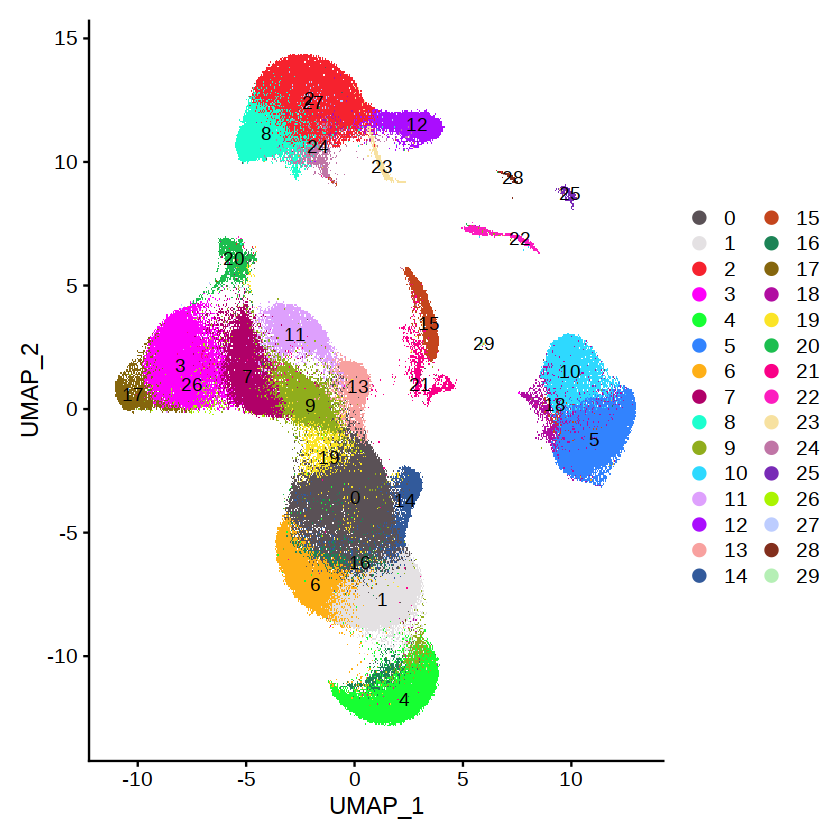

In [5]:
#misc.pbmc <- RunUMAP(misc.pbmc, reduction = "pca", dims = 1:30) 

#plot3 <- DimPlot(misc.pbmc, reduction = "umap", group.by = "orig.ident") 
#plot3

## Find neighbors and clusters (louvain) based on PCA, and then run umap 

#misc.pbmc <- FindNeighbors(misc.pbmc, dims = 1:30) 
#misc.pbmc <- FindClusters(misc.pbmc, resolution = 1, random.seed= 10) 
#misc.pbmc <- RunUMAP(misc.pbmc, dims = 1:30) 

plot4 <- DimPlot(misc.pbmc, reduction = "umap", 
                 cols=DiscretePalette(36, palette='polychrome'),
                 pt.size =0.05, label = TRUE)
plot4

## Find Markers

In [6]:
# Find markers to delineate clusters

#ref2_markers <- FindAllMarkers(misc.pbmc, only.pos = TRUE,
#                               min.pct = 0.25, logfc.threshold = 0.25, assay = "RNA")

#head(ref2_markers)

head(FindMarkers(misc.pbmc, ident.1 = 14, ident.2 = 1)) # example of DEG analysis to define clusters

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD74,0,1.3660161,0.959,0.929,0
HLA-DPB1,0,1.1282893,0.954,0.953,0
HLA-DRB5,0,2.0272929,0.966,0.898,0
LGALS1,0,1.3814016,0.798,0.730,0
GAPDH,0,0.8927314,0.985,0.963,0
PRF1,0,0.5087864,0.908,0.880,0
CCR10,0,0.5083647,0.670,0.119,0
LMNA,0,0.6256146,0.725,0.537,0
TYMP,0,0.4279961,0.733,0.513,0


In [8]:
cluster_prop <- table(Idents(misc.pbmc), misc.pbmc$orig.ident)

head(cluster_prop)

   
     C27  C32  C33  C39 HA5876 HA5877 HA5894 HA5952 HA5953 HA5957 HD_32M HD_35F
  0  494  333  591  301    824    673    666    834   1178    955   1037   1596
  1  307  240  317  334    795    658   1039    757    888    479   1143   1114
  2  488  544  247  473    704    558    519    454    250    378    783    501
  3  366  216  544  166    374    714    559    544    232    681    715    790
  4   93   60  137   84    674    350    924    273    339    490    861    661
  5  327  403  202  215    347    118    237    108    103    315    225    296
   
    HD_36M NC-13F NS0A NS0B NS1A NS1B TP8B TP9B TS2A TS2B TS3A TS3B Y111-1
  0    859   1070 1516  412 1385 1248  209   46  549  759  832 1247    220
  1    817   1446 2165  406  685  709  186   17  251  339  170  440    143
  2    931    727  812  463 1665 2462  206  233 1127  357  405 1065   1947
  3   2023    496  742  268  392  558  438   99  974  617  676  602    202
  4    415   1397  226   72  209  212   55    3  145  131

# Determine cell type proportions

In [34]:
samples <- cluster_prop

samples <- rbind(samples, colSums(samples[1:30,]))

samples_prop <- samples

head(samples_prop)

,C27,C32,C33,C39,HA5876,HA5877,HA5894,HA5952,HA5953,HA5957,⋯,Y124-1,Y124-R,Y125-1,Y127-1,Y129-1,Y28-2,Y28-4,Y29-2,Y54-4,Y70-4
0,494,333,591,301,824,673,666,834,1178,955,⋯,686,1032,1352,895,130,982,961,772,926,1242
1,307,240,317,334,795,658,1039,757,888,479,⋯,914,1495,1793,855,103,1515,1843,1475,1097,1278
2,488,544,247,473,704,558,519,454,250,378,⋯,710,880,306,1090,1022,843,457,1160,310,947
3,366,216,544,166,374,714,559,544,232,681,⋯,218,568,234,600,41,443,1372,327,167,1551
4,93,60,137,84,674,350,924,273,339,490,⋯,1025,1682,2849,596,210,784,936,951,873,548
5,327,403,202,215,347,118,237,108,103,315,⋯,2136,628,2163,1417,769,848,728,839,143,581


Normalize for donor contribution and set up plottable object

In [35]:
for(j in 1:ncol(samples)){ 
  for(i in 1:nrow(samples)){
    samples_prop[i,j] <- samples[i,j]/samples[nrow(samples),j]
  }
}

rownames(samples_prop)[31] <- "sums"

donor.names <- colnames(samples_prop)[1:ncol(samples_prop)]
samples_prop <- samples_prop[1:30,]
samples_plot <- melt(samples_prop[1:30,], measure.vars = donor.names, id.vars = rownames(samples_prop))
names(samples_plot) <- c("seurat_clusters", "donor", "value")
samples_plot$seurat_clusters <- as.factor(samples_plot$seurat_clusters)

samples_plot[samples_plot$donor %in% c("C27", "C32", "C33", "C39", "HA5876", "HA5877",
                                          "HA5894", "HA5952", "HA5953", "HA5957", "HD_32M", 
                                          "HD_35F", "HD_36M"), 'condition'] <- 'A.HD'

samples_plot[samples_plot$donor %in% c("NS0A", "NS1A", "TS2A","TS3A"), 'condition'] <- 'COVID19-A'

samples_plot[samples_plot$donor %in% c("NS0B", "NS1B", "TP8B", "TP9B", 
                                          "TS2B", "TS3B"), 'condition'] <- 'COVID19-B'

samples_plot[samples_plot$donor %in% c("Y124-1", "Y125-1", "Y127-1", "Y111-1", 
                                          "Y113-1", "Y117-1", "Y129-1"), 'condition'] <- 'MIS-C'

samples_plot[samples_plot$donor %in% c("NC-13F", "Y28-2", "Y28-4", 
                                          "Y29-2", "Y54-4", "Y70-4"), 'condition'] <- 'C.HD'

samples_plot[samples_plot$donor %in% c("Y117-R", "Y124-R"), 'condition'] <- 'MIS-C-R'

We need an extra data frame to plot severe patients with different colors 

In [36]:
table(samples_plot$donor)


   C27    C32    C33    C39 HA5876 HA5877 HA5894 HA5952 HA5953 HA5957 HD_32M 
    30     30     30     30     30     30     30     30     30     30     30 
HD_35F HD_36M NC-13F   NS0A   NS0B   NS1A   NS1B   TP8B   TP9B   TS2A   TS2B 
    30     30     30     30     30     30     30     30     30     30     30 
  TS3A   TS3B Y111-1 Y113-1 Y117-1 Y117-R Y124-1 Y124-R Y125-1 Y127-1 Y129-1 
    30     30     30     30     30     30     30     30     30     30     30 
 Y28-2  Y28-4  Y29-2  Y54-4  Y70-4 
    30     30     30     30     30 

In [37]:
samples_plot_severe <- samples_plot %>% filter(donor %in% c("Y111-1", "Y113-1", "Y117-1", "Y127-1","Y129-1"))
head(samples_plot_severe)

,seurat_clusters,donor,value,condition
,<fct>,<fct>,<dbl>,<chr>
1,0,Y111-1,0.02466921,MIS-C
2,1,Y111-1,0.01603499,MIS-C
3,2,Y111-1,0.21832249,MIS-C
4,3,Y111-1,0.02265082,MIS-C
5,4,Y111-1,0.04193765,MIS-C
6,5,Y111-1,0.07815654,MIS-C


Add annotations

In [38]:
annotations <- data.frame("seurat_clusters" = c(0:29), 
                         "annotation" = c("CD4 memory", "CD4 naive I", "Classical monocytes", "CD56dim CD16bright NK", 
                         "CD8 naive", "Naive B", "CD4 naive II", "CD8 effector", "Neutrophils", "CD8 memory", "Memory B", 
                         "gdT cells", "Non classical monocytes", "MAIT-NKT cells", "Regulatory T cells", "Platelets", "CD4 and CD8 mixed naive", 
                         "CD56bright CD16dim NK", "T-NK-B cell doublets", "CD4 and CD8 activated memory", "Proliferating T and NK cell",
                         "Platelet-T cell doublets", "Plasma cells", "Conventional DC", "Platelet-bound monocytes", "Plasmacytoid DC", 
                         "NK-T doublets", "NK-monocyte doublets", "Progenitor", "Erythroid "))
annotations$seurat_clusters <- as.factor(annotations$seurat_clusters)
samples_plot <- left_join(samples_plot, annotations)
samples_plot_severe <- left_join(samples_plot_severe, annotations)

samples_plot[,6] <- samples_plot[,3]*100
samples_plot_severe[,6] <- samples_plot_severe[,3]*100
names(samples_plot)[6] <- "percentage"
names(samples_plot_severe)[6] <- "percentage"

samples_plot <- samples_plot %>% filter(annotation %in% 
                                          c("CD4 memory", "CD4 naive I", "CD4 naive II", 
                                            "CD8 naive", "CD8 effector", "CD8 memory",
                                            "Regulatory T cells", "CD4 and CD8 mixed naive", 
                                            "CD4 and CD8 activated memory", 
                                            "Proliferating T and NK cell",
                                            "CD56dim CD16bright NK", "gdT cells", 
                                            "MAIT-NKT cells", "CD56bright CD16dim NK",
                                            "Naive B", "Memory B", "Plasma cells",
                                            "Neutrophils", "Classical monocytes", 
                                            "Non classical monocytes", 
                                            "Platelets", "Platelet-bound monocytes", 
                                            "Conventional DC", "Plasmacytoid DC","Progenitor", 
                                            "Erythroid "))

samples_plot_severe <- samples_plot_severe %>% filter(annotation %in% 
                                                      c("CD4 memory", "CD4 naive I", 
                                                        "CD4 naive II", "CD8 naive", 
                                                        "CD8 effector", "CD8 memory", 
                                                        "Regulatory T cells", 
                                                        "CD4 and CD8 mixed naive", 
                                                        "CD4 and CD8 activated memory",
                                                        "Proliferating T and NK cell", 
                                                        "CD56dim CD16bright NK", "gdT cells", 
                                                        "MAIT-NKT cells", "CD56bright CD16dim NK", 
                                                        "Naive B", "Memory B", 
                                                        "Plasma cells", "Neutrophils", 
                                                        "Classical monocytes", "Non classical
                                                        monocytes", "Platelets", 
                                                        "Platelet-bound monocytes",  
                                                        "Conventional DC", 
                                                        "Plasmacytoid DC","Progenitor", "Erythroid "))

level_order <-  c("C.HD", "MIS-C", "MIS-C-R", "A.HD", "COVID19-A", "COVID19-B")

annotation_order <- c("CD4 memory", "CD4 naive I", "CD4 naive II", "CD8 naive", 
                      "CD8 effector", "CD8 memory", "Regulatory T cells", 
                      "CD4 and CD8 mixed naive", "CD4 and CD8 activated memory", 
                      "Proliferating T and NK cell", "CD56dim CD16bright NK", 
                      "gdT cells", "MAIT-NKT cells", "CD56bright CD16dim NK",
                      "Naive B", "Memory B", "Plasma cells", "Neutrophils",
                      "Classical monocytes", "Non classical monocytes", "Platelets", 
                      "Platelet-bound monocytes", 
                      "Conventional DC", "Plasmacytoid DC","Progenitor", "Erythroid ")
#                      "T-NK-B cell doublets",
#                      "Platelet-T cell doublets", "NK-T doublets", "NK-monocyte doublets")

samples_plot$annotation <- factor(samples_plot$annotation, level = annotation_order)
samples_plot_severe$annotation <- factor(samples_plot_severe$annotation, level = annotation_order)


samples_plot <- samples_plot %>% filter(condition %in% c("C.HD", "MIS-C", "MIS-C-R"))
samples_plot_severe <- samples_plot_severe %>% filter(condition %in% c("C.HD", "MIS-C", "MIS-C-R"))

head(samples_plot)

Joining, by = "seurat_clusters"

Joining, by = "seurat_clusters"



,seurat_clusters,donor,value,condition,annotation,percentage
,<fct>,<fct>,<dbl>,<chr>,<fct>,<dbl>
1,0,NC-13F,0.11285729,C.HD,CD4 memory,11.285729
2,1,NC-13F,0.15251556,C.HD,CD4 naive I,15.251556
3,2,NC-13F,0.07667968,C.HD,Classical monocytes,7.667968
4,3,NC-13F,0.05231516,C.HD,CD56dim CD16bright NK,5.231516
5,4,NC-13F,0.14734733,C.HD,CD8 naive,14.734733
6,5,NC-13F,0.07024575,C.HD,Naive B,7.024575


Pvalue calculations

In [40]:
condition_pvals <- list()

pvals <- list()

cluster_num <- annotation_order

level_order <- c("C.HD", "MIS-C", "MIS-C-R")

for(j in 1:length(level_order)){
  for(i in 1:length(cluster_num)){
    cluster <- samples_plot %>% filter(annotation == cluster_num[i] & condition == level_order[j])
    pvals[[i]] <- cluster$percentage
  }
  names(pvals) <- annotation_order
  condition_pvals[[j]] <- pvals
  names(condition_pvals)[j] <- level_order[j]
}

# For CHD/MISC comparison 

chd_misc_pvals <- c()
annot <- names(pvals)

for(i in 1:length(annot)){
  w.test <- wilcox.test(x = condition_pvals[['C.HD']][[annot[i]]],
                        y = condition_pvals[['MIS-C']][[annot[i]]],
                        alternative = c("two.sided"), correct = FALSE)
  chd_misc_pvals[i] <- w.test$p.value
}

chd_misc_df <- data.frame(pval=chd_misc_pvals, facet_name=names(pvals))

names(chd_misc_df)[2] <- "annotation"

#write.csv(chd_misc_df2, file = "wilcoxon_pbmc_compositions.csv")

# 
chd_misc_df$comp.a <- 'C.HD'
chd_misc_df$comp.b <- 'MIS-C'

chd_misc_df$ypos <- c(15,22,15,20,10,6,2.5,10,3,3,10,10,7.5,4,30,7,6,30,20,4,10,3.75,2,1.75,0.4,0.3) #will be overlapping
chd_misc_df$annotation <- factor(chd_misc_df$annotation, level = annotation_order)


for(i in 1:nrow(chd_misc_df)){
  pval <- chd_misc_df[i,1]
  chd_misc_df[i,1] <- format.pval(as.double(as.character(pval)), digits=1, eps=0.001)
}

chd_misc_df <- chd_misc_df %>% filter(pval < 0.051)

Warning message in wilcox.test.default(x = condition_pvals[["C.HD"]][[annot[i]]], :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(x = condition_pvals[["C.HD"]][[annot[i]]], :
“cannot compute exact p-value with ties”


Plotting

Warning message:
“Ignoring unknown aesthetics: xmin, xmax, annotations, y_position”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



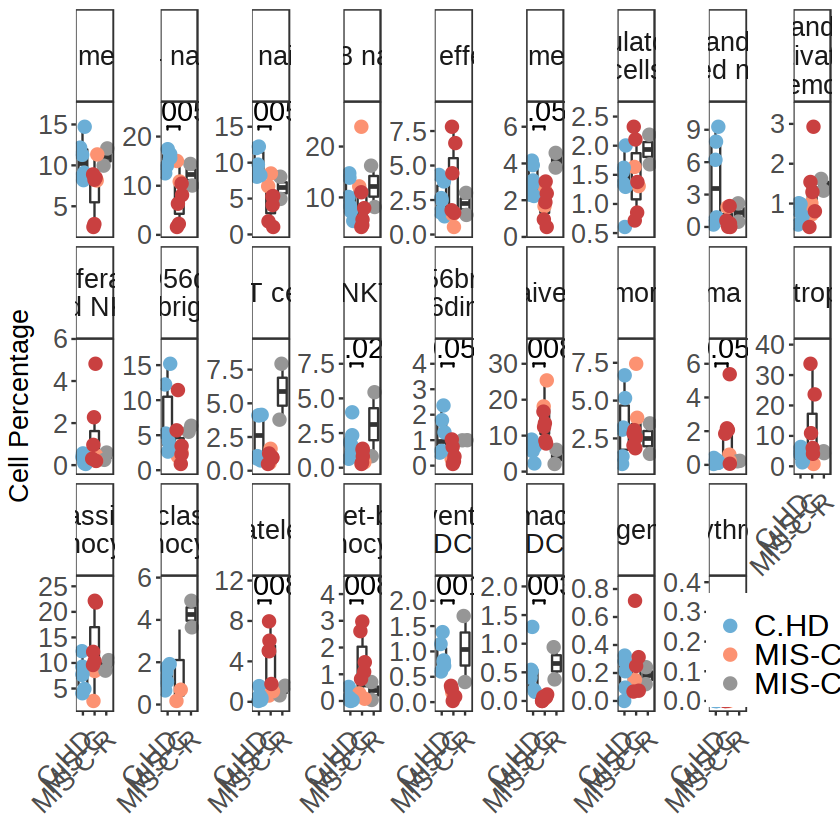

In [43]:
# Remove extra points from samples_plot for plotting
samples_plot2 <- samples_plot %>% filter(!(donor %in% c("Y111-1", "Y113-1", "Y117-1", "Y127-1","Y129-1")))


cols <- c("#6baed6", "#FC9272", "#969696")

# This will give you the entire facet plot. Keep only the significant/interesting ones

plot1 <- ggplot(samples_plot, aes(x = factor(condition, level = level_order), y = percentage)) + 
  geom_boxplot(outlier.shape = NA) + 
  geom_jitter(data = samples_plot2, aes(colour = factor(condition, level = level_order)), size = 3, width = 0.25) + 
  geom_jitter(data=samples_plot_severe, aes(group = factor(condition, level = level_order)), 
              colour ="#c94040",  size = 3, width = 0.25)+
  geom_signif(data=chd_misc_df, aes(xmin=comp.a, xmax=comp.b, annotations=pval, y_position=ypos),
              textsize = 6, vjust=-0.2, manual=TRUE) + ylim(c(NA, 5)) +
  facet_wrap(~annotation, nrow=3, scales='free_y', labeller = label_wrap_gen(15)) +
  scale_color_manual(values = cols) +theme_bw() +
  scale_y_continuous(expand = expansion(mult=c(0.1, 0.25))) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1, size = 16),
        axis.text.y = element_text(size = 16),
        axis.title.y = element_text(size = 16),
        plot.title = element_text(size =10),
        legend.text = element_text(size=18),
        legend.title = element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        strip.text = element_text(size = 16, margin =margin()),
        strip.text.x = element_text(margin = margin( b = 3, t = 3)),
        strip.background = element_rect(fill="white"),
        legend.position = c(0.95,0.1)) +
  ylab("Cell Percentage") +
  xlab("") 

plot1

# Dot plot

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



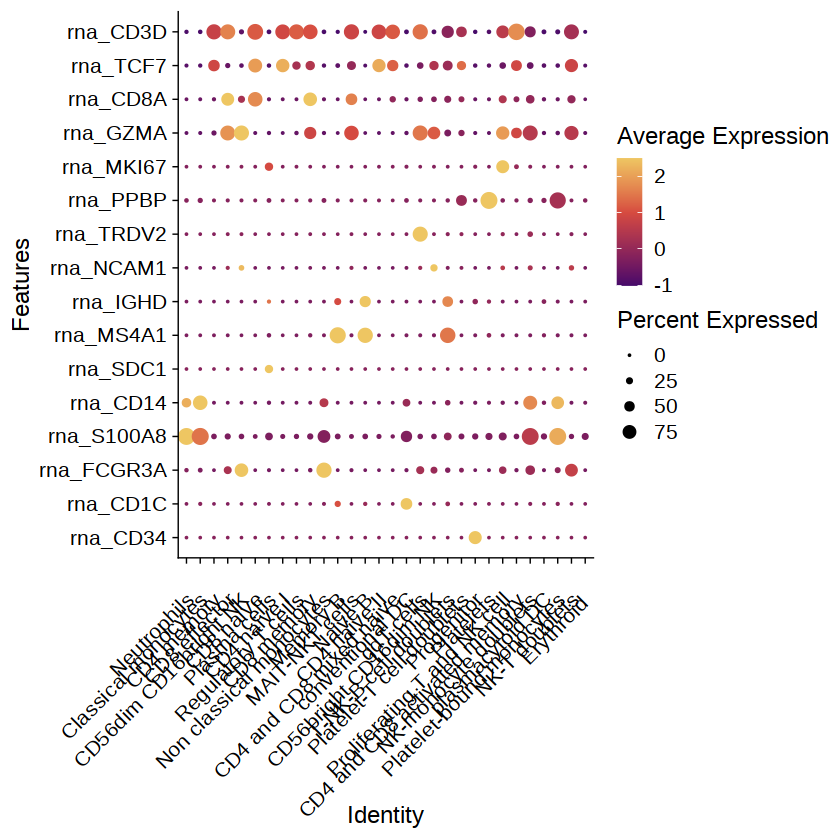

In [11]:
features.pbmc.small <- c("rna_CD3D", "rna_TCF7", "rna_CD8A", "rna_GZMA", "rna_MKI67", "rna_PPBP", 
                         "rna_TRDV2", "rna_NCAM1","rna_IGHD", "rna_MS4A1", "rna_SDC1", "rna_CD14",
                         "rna_S100A8", "rna_FCGR3A","rna_CD1C", "rna_CD34")


Idents(misc.pbmc) <- "annotation"

inferno_mod <- inferno(20)[3:18]

dotplot <- DotPlot(misc.pbmc, features = rev(features.pbmc.small),  
               assay = "RNA", dot.scale = 3.75)+ 
  scale_color_gradient2(low = inferno_mod[3], mid = "#D64B40FF", high = "#F1ED6FFF", midpoint = 1) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1, size = 12),
        axis.line = element_line(size = 0.3), axis.ticks = element_line(size = 0.3)) + 
  coord_flip()

dotplot

# Viral and Bacterial Scores

Modify factor levels

In [6]:
condition_order <-  c("C.HD", "MIS-C", "MIS-C-R", "A.HD", "COVID19-A", "COVID19-B")
misc.pbmc@meta.data$condition_new <- factor(misc.pbmc@meta.data$condition_new, level = condition_order)
sample_order <-  c("C.HD1", "C.HD2", "C.HD3", "C.HD4", "C.HD5", "C.HD6",
                   "P1.1", "P2.1", "P3.1", "P4.1", "P5.1", "P6.1", "P7.1",
                   "P3.2", "P4.2", "A.HD1", "A.HD2", "A.HD3", "A.HD4", "A.HD5",
                   "A.HD6", "A.HD7", "A.HD8", "A.HD9", "A.HD10", "A.HD11", "A.HD12", 
                   "A.HD13", "A.COV1.1", "A.COV2.1", "A.COV3.1", "A.COV4.1", "A.COV1.2",
                   "A.COV2.2", "A.COV3.2", "A.COV4.2", "A.COV5.2", "A.COV6.2")
misc.pbmc@meta.data$sample_id <- factor(misc.pbmc@meta.data$sample_id, level = sample_order)
cols <- c("#6baed6", "#c94040", "#969696", "#9970ab", "#ec7014", "#fec44f")

AddModuleScore to compute viral and bac scores from Lydon et al. and Hadjadj et al.

In [7]:
ifn <- list(c("SIGLEC1","RABGAP1L","IFI27","CADM1","RSAD2","MX1","SERPING1")) 
bac <- list(c("SMPD1","CD44","SERPING1","SPI1","HERC1","MCTP1","FOLR3","CFAP45",
              "PRF1","CTBP1","HLA-DRB1","ARL1","OAS3","ZER1", "IFIT2","IFITM1"))
# Hadjadj et al.
viral_h <- list(c("IFI44L", "IFI27", "RSAD2", "SIGLEC1", "IFIT1", "ISG15"))

# Identify monocyte and neutrophil clusters

misc.pbmc <- AddModuleScore(misc.pbmc, name = "Viral_score_up", nbins=24, ctrl=100,
                             features = ifn, assay = "RNA") #not scaled

Idents(misc.pbmc) <- "seurat_clusters"
misc.mono <- subset(misc.pbmc, idents = c(2,8,12)) #just mono and neut

pbmc_meta <- misc.mono[[]]

# Export for box plot statistical analysis- this can be done with any of the scores

df_myeloid <- data.frame('sample' = pbmc_meta$sample_id, 'score' = pbmc_meta$Viral_score_up1, 
                         'cluster' = pbmc_meta$annotation, 'condition' = pbmc_meta$condition)
head(df_myeloid)

#

,sample,score,cluster,condition
,<fct>,<dbl>,<chr>,<chr>
1,A.COV2.1,0.1367507,Neutrophils,COVID19
2,A.COV2.1,0.3762566,Classical monocytes,COVID19
3,A.COV2.1,0.3815681,Classical monocytes,COVID19
4,A.COV2.1,0.4938281,Neutrophils,COVID19
5,A.COV2.1,0.3151471,Classical monocytes,COVID19
6,A.COV2.1,0.2712613,Neutrophils,COVID19


## Import and plot data from module scores

Format

In [16]:
cyto <- df_myeloid

names <- unique(as.character(cyto$sample))
means <- data.frame("name" = rep(NA,38), "value" = rep(NA,38))

for(i in 1:length(names)){
  cyto_tmp <- cyto %>% filter(sample == names[i])
  means[i,1] <- names[i]
  means[i,2] <- mean(cyto_tmp[,2])
}

means[means$name %in% c("A.HD1", "A.HD2", "A.HD3", "A.HD4", "A.HD5", "A.HD6",
                        "A.HD7", "A.HD8", "A.HD9", "A.HD10", "A.HD11",
                        "A.HD12", "A.HD13"), 'condition'] <- 'A.HD'

means[means$name %in% c("A.COV1.1", "A.COV2.1", "A.COV3.1","A.COV4.1"), 'condition'] <- 'COVID19-A'

means[means$name %in% c("A.COV1.2", "A.COV2.2", "A.COV3.2", "A.COV4.2",
                        "A.COV5.2", "A.COV6.2"), 'condition'] <- 'COVID19-B'

means[means$name %in% c("P1.1", "P2.1", "P3.1", "P4.1",
                        "P5.1", "P6.1", "P7.1"), 'condition'] <- 'MIS-C'

means[means$name %in% c("C.HD1", "C.HD2", "C.HD3", 
                        "C.HD4", "C.HD5", "C.HD6"), 'condition'] <- 'C.HD'

means[means$name %in% c("P3.2", "P4.2"), 'condition'] <- 'MIS-C-R'

means_severe <- means %>% filter(name %in% c("P1.1", "P2.1", "P3.1", "P6.1", "P7.1"))


level_order <-  c("C.HD", "MIS-C", "MIS-C-R", "A.HD", "COVID19-A", "COVID19-B")

means$condition <- factor(means$condition, level = level_order)
means_severe$condition <- factor(means_severe$condition, level = level_order)

In [18]:
head(means_severe)

,name,value,condition
,<chr>,<dbl>,<fct>
1,P1.1,-0.04086608,MIS-C
2,P2.1,-0.04385052,MIS-C
3,P3.1,-0.04890659,MIS-C
4,P6.1,-0.05610015,MIS-C
5,P7.1,-0.05230393,MIS-C


Plot

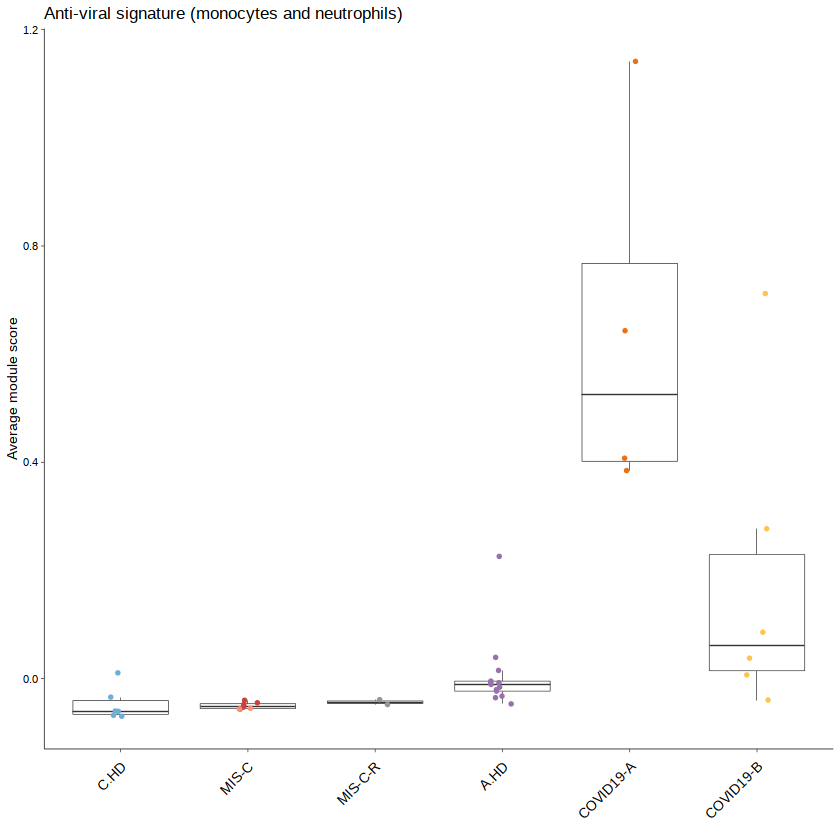

In [19]:
means2 <- means %>% filter(!(name %in% c("P1.1", "P2.1", "P3.1", "P6.1", "P7.1")))

cols <- c("#6baed6", "#FC9272", "#969696", "#9970ab", "#ec7014", "#fec44f")

plot1 <- ggplot(means, aes(x = condition, y = value)) +
  geom_boxplot(lwd=0.15, outlier.shape = NA) + 
  geom_jitter(data=means_severe, colour ="#c94040",  size = 0.5, width = 0.1)+
  geom_jitter(data = means2, aes(colour = factor(condition, level = level_order)), size = 0.5, width = 0.1) +
  scale_color_manual(values = cols) +
  ggtitle("Anti-viral signature (monocytes and neutrophils)") +
  xlab("") +
  theme_classic(base_size = 8) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.9, hjust=1, size = 8, color = "black"),
        axis.text.y = element_text(color = "black"), axis.line = element_line(size = 0.15), 
        legend.position = "none", axis.ticks = element_line(size = 0.15)) +
  ylab("Average module score") 

plot1
